# Esteganografia

Esse projeto aborda o conceito de esteganografia, uma técnica que permite esconder informações dentro de arquivos digitais, como imagens. Este método é utilizado para proteger dados de maneira discreta, escondendo mensagens em imagens sem alterar sua aparência visível de forma significativa.

## Descrição
A esteganografia é implementada utilizando a manipulação de pixels em imagens RGB. Ele realiza a codificação de uma mensagem dentro de uma imagem e permite a decodificação dessa mensagem posteriormente. Existem diversas formas de codificar os dados nos pixels das imagens, normalmente é utilizado ate 3 bits por canal por pixel, onde até 3 pixels não afeta a imagem de forma significativa. 

A técnica empregada altera os bits menos significativos (LSBs) de cada canal de cor (R, G, B) para armazenar a informação textual. Se utilizado uma imagem tons de cinza menos informação será armazenada por pixel, logo que há apenas um canal por pixel

## Código

- **Codificação**

    Como cada cor em um pixel (vermelho, verde, azul) é representada por 8 bits, a alteração do bit menos significativo é imperceptível ao olho humano.

    A imagem é convertida em um array NumPy, facilitando a manipulação dos valores de pixels, é então convertida em binário, e um delimitador 'EOF' é adicionado para marcar o fim da mensagem, a função itera sobre os pixels da imagem e altera o LSB de cada canal de cor para armazenar os bits da mensagem ao final imagem com a mensagem embutida é retornada.

    ```python
    def codificar(imagem, texto):
        if imagem.mode != 'RGB':
            imagem = imagem.convert('RGB')
        img = np.array(imagem)

        texto = texto + 'EOF'

        texto_bin = ''.join(format(ord(i), '08b') for i in texto)
        
        index = 0

        for i in range(imagem.size[0]):
            for j in range(imagem.size[1]):
                for k in range(3):

                    if index < len(texto_bin):
                        img[i][j][k] = int(bin(img[i][j][k])[2:9] + texto_bin[index], 2)
                        index += 1

                    else:
                        break

        img = Image.fromarray(img)
        return img
    ```

- **Decodificação**

    Faz o processo inverso da codificação. Ela extrai os LSBs de cada canal de cor da imagem, reconstrói a mensagem em binário, e a converte de volta para caracteres de texto.

    A imagem é convertida em um array NumPy, os bits são extraídos confrme a codificação e concatenados para formar a mensagem em binário,texto binário é convertido em caracteres ASCII até o delimitador 'EOF' ser detectado, sinalizando o fim da mensagem que ao final retorna a mensagem

    ```python
    def decodificar(imagem):
        if imagem.mode != 'RGB':
            imagem = imagem.convert('RGB')
        img = np.array(imagem)

        texto_bin = ""

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                for k in range(3):
                    texto_bin += bin(img[i, j, k])[2:].zfill(8)[-1]

        texto = ""

        for i in range(0, len(texto_bin), 8):
            
            texto += chr(int(texto_bin[i:i+8], 2))
            if texto[-3:] == "EOF":
                break

        return texto[:-3]
    ```

### Codigo final

Escolha a imagem: 
1 - Jadir Cinza
2 - Jadir
3 - Outra
4 - Decodificar Imagem
Tamanho maximo de caracters da mensagem:  539997
Digite a mensagem: 


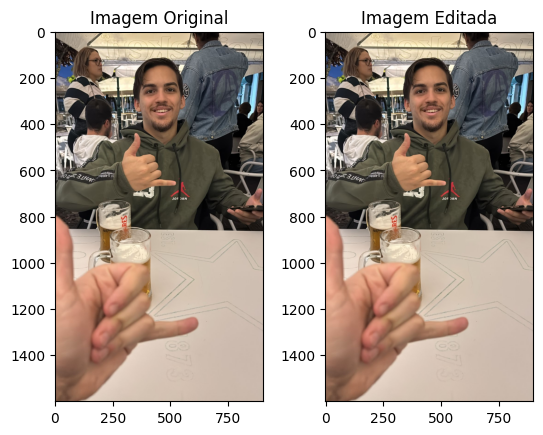

Desenha salvar a imagem? (s/N)
Mensagem:  Opa tudo bem? Teste TESTE :P :D ^ ^, Essa foi minha mensagem!


In [ ]:
import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def codificar(imagem, texto):
    if imagem.mode != 'RGB':
        imagem = imagem.convert('RGB')
        
    img = np.array(imagem)

    texto = texto + 'EOF'

    texto_bin = ''.join(format(ord(i), '08b') for i in texto)
    
    index = 0

    for i in range(imagem.size[0]):

        for j in range(imagem.size[1]):

            for k in range(3):

                if index < len(texto_bin):

                    img[i][j][k] = int(bin(img[i][j][k])[2:9] + texto_bin[index], 2)

                    index += 1

                else:

                    break

    img = Image.fromarray(img)

    return img

def decodificar(imagem):
    if imagem.mode != 'RGB':
        imagem = imagem.convert('RGB')
        
    img = np.array(imagem)

    texto_bin = ""

    for i in range(img.shape[0]):

        for j in range(img.shape[1]):

            for k in range(3):

                texto_bin += bin(img[i, j, k])[2:].zfill(8)[-1]

    texto = ""

    for i in range(0, len(texto_bin), 8):

        texto += chr(int(texto_bin[i:i+8], 2))

        if texto[-3:] == "EOF":

            break

    return texto[:-3]

def mensagem(imagem):
    pix = imagem.size[0] * imagem.size[1]
    chars = ((pix * 3) // 8) - 3

    print("Tamanho maximo de caracters da mensagem: ", chars)
    print("Digite a mensagem: ")
    entrada = input()

    if len(entrada) > chars:
        print("Mensagem muito grande")
        return
    
    return entrada

def salvar(imagem, nome):
    print("Deseja salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def main():
    jadirCinza = Image.open('imgs/NEWjadirCinza.jpg')
    jadir = Image.open('imgs/jadirs.jpg')

    print("Escolha a imagem: ")
    print("1 - Jadir Cinza")
    print("2 - Jadir")
    print("3 - Outra")
    print("4 - Decodificar Imagem")
    entrada = input()
    
    match entrada:
        case "1":
            txt = mensagem(jadirCinza)
            codificada = codificar(jadirCinza, txt)
            plot(jadirCinza, codificada, "Imagem Original", "Imagem Editada")
            salvar(codificada, "Jadir Cinza")
            print("Mensagem: ", decodificar(codificada))
        case "2":
            txt = mensagem(jadir)
            codificada = codificar(jadir, txt)
            plot(jadir, codificada, "Imagem Original", "Imagem Editada")
            salvar(codificada, "Jadir")
            print("Mensagem: ", decodificar(codificada))
        case "3":
            print("Digite o nome da imagem: ")
            entrada = input()
            imagem = Image.open("imgs/" + entrada)
            txt = mensagem(imagem)
            codificada = codificar(imagem, txt)
            plot(imagem, codificada, "Imagem Original", "Imagem Editada")
            salvar(codificada, entrada)
            print("Mensagem: ", decodificar(codificada))
        case "4":
            print("Digite o nome da imagem: ")
            entrada = input()
            imagem = Image.open("imgs/" + entrada)
            print("Mensagem: ", decodificar(imagem)) 
        


    #plot(jadir,jadirCinza, "Jadir Normal", "JADIR CINZA")


if __name__ == "__main__":
    main()
